# Initial setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
data=pd.read_csv("D:\Data Science and Analytics\CaseStudy 2\StudentsPerformance.csv")

# Displaying Data

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1. Find out how many males and females participated in the test.

In [4]:
#1-Find if there is any error that might have occured while preparing data.
# We can know it by checking if there are any string values other than "female"or"male"

data["gender"].unique()

#From below result we can see that there are no other values

array(['female', 'male'], dtype=object)

In [5]:
#2-Counting number of males and females participated
maleCount=len(data[data["gender"]=="male"])
femaleCount=len(data[data["gender"]=="female"])
print("Number of males participated = ",maleCount)
print("Number of females participated = ",femaleCount)

Number of males participated =  482
Number of females participated =  518


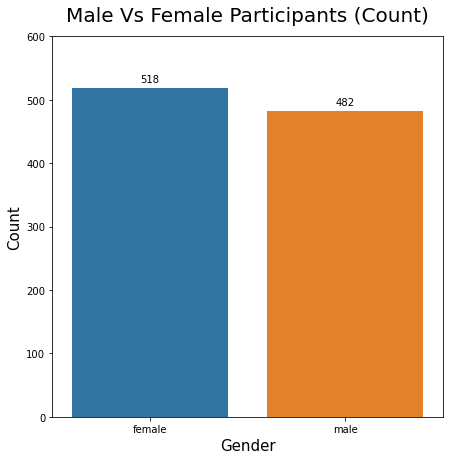

In [6]:
#Plotting Graph
fig, ax = plt.subplots(figsize=(7,7))
plt.ylim(0, 600)
plt.xlabel("xlabel",fontsize=15)
plt.ylabel("ylabel",fontsize=15)
graph=sns.countplot(x=data["gender"])
graph.set_title("Male Vs Female Participants (Count)",fontsize=20,pad=15)
graph.set(xlabel="Gender", ylabel="Count")

for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

## <span style="color:green">INSIGHT</span>
### <span style="color:red">• Females participated more than Males by a count of 36</span>

# 2. What do you think about the students' parental level of education?

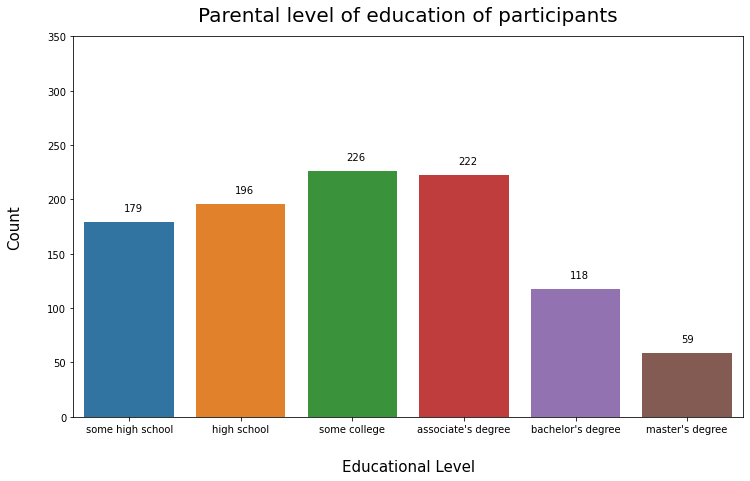

In [7]:
#Ploting graph for better understanding

fig, ax = plt.subplots(figsize=(12,7))
plt.ylim(0, 350)
plt.xlabel("xlabel",fontsize=15)
plt.ylabel("ylabel",fontsize=15)
ax.yaxis.labelpad = 25
ax.xaxis.labelpad = 25
graph=sns.countplot(x=data["parental level of education"])
graph.set_title("Parental level of education of participants",fontsize=20,pad=15)
graph.set(xlabel="Educational Level", ylabel="Count")
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))


## <span style="color:green">INSIGHTS</span>
### <span style="color:red">• Parents of majority test participants' parents have Associate degree or lower qualification.</span>
### <span style="color:red">• Very few participants have parents' with master degree</span>

# 3. Who scores the most on average for math, reading and writing based on
●Gender
●Test preparation course

### Gender

In [8]:
#On basis of Gender
dataGender=data[["gender","math score","reading score","writing score"]]

dataMale=dataGender[dataGender["gender"]=="male"]
dataFemale=dataGender[dataGender["gender"]=="female"]

print("Mean score values of MALE participants are:\n",dataMale.mean(),"\n")
print("Mean score values of FEMALE participants are:\n",dataFemale.mean())


Mean score values of MALE participants are:
 math score       68.821577
reading score    65.545643
writing score    63.446058
dtype: float64 

Mean score values of FEMALE participants are:
 math score       63.376448
reading score    72.590734
writing score    72.467181
dtype: float64


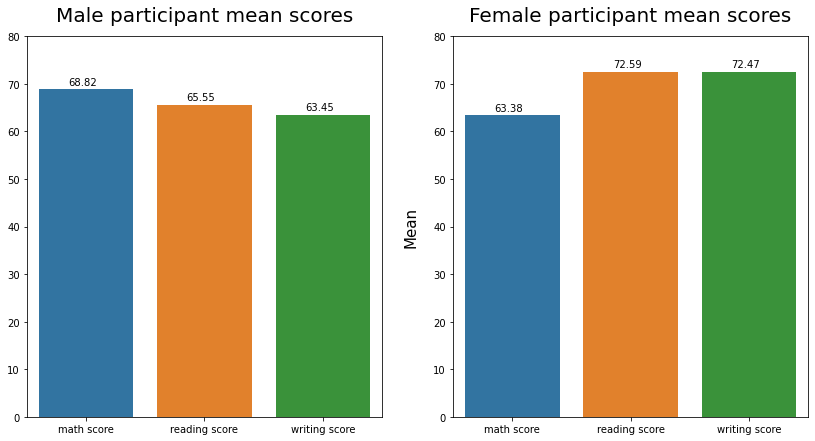

In [9]:
#Plotting graphs for better unerstanding

fig, ax = plt.subplots(1,2,figsize=(14,7))

ax[0].set_ylim(0, 80)
ax[1].set_ylim(0, 80)
plt.xlabel("xlabel",fontsize=15)
plt.ylabel("ylabel",fontsize=15)

ax[1].yaxis.labelpad = 15
ax[1].xaxis.labelpad = 25
graph=sns.barplot(x=dataMale.columns[1:4].tolist(),y=dataMale.mean(),ax=ax[0])
graph.set_title("Male participant mean scores",fontsize=20,pad=15)
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))

graph=sns.barplot(x=dataFemale.columns[1:4].tolist(),y=dataFemale.mean(),ax=ax[1])
graph.set_title("Female participant mean scores",fontsize=20,pad=15)
graph.set(xlabel=None,ylabel="Mean")
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))


### <span style="color:green">INSIGHT</span>
### <span style="color:red">• Females have better score in reading and writing where as males did better on maths score.</span>

### Test preparation

In [10]:
#On basis on Test preparation course

dataTestpreparation=data[["test preparation course","math score","reading score","writing score"]]

dataTestnone=dataTestpreparation[dataTestpreparation["test preparation course"]=="none"]
dataTestcom=dataTestpreparation[dataTestpreparation["test preparation course"]=="completed"]

print("Mean score values of participants who did'nt take course are:\n",dataTestnone.mean(),"\n")
print("Mean score values of participants who took course are:\n",dataTestcom.mean())


Mean score values of participants who did'nt take course are:
 math score       63.789720
reading score    66.417445
writing score    64.457944
dtype: float64 

Mean score values of participants who took course are:
 math score       69.966480
reading score    74.175978
writing score    74.684358
dtype: float64


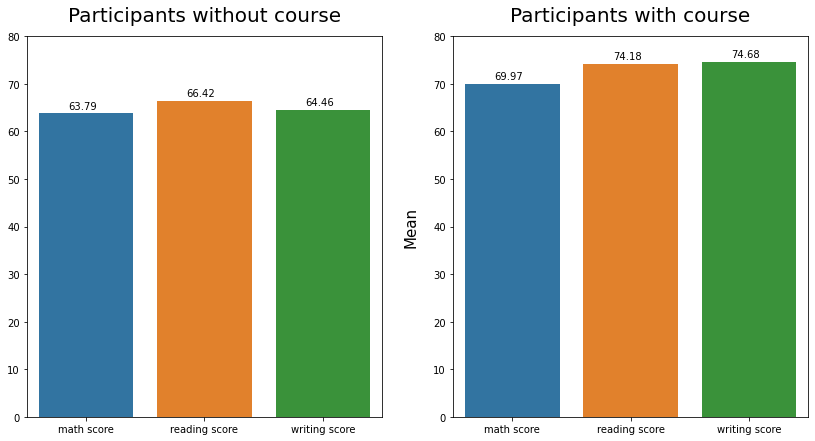

In [11]:
#Plotting graphs for better understanding

fig, ax = plt.subplots(1,2,figsize=(14,7))

ax[0].set_ylim(0, 80)
ax[1].set_ylim(0, 80)
plt.xlabel("xlabel",fontsize=15)
plt.ylabel("ylabel",fontsize=15)

ax[1].yaxis.labelpad = 15
ax[1].xaxis.labelpad = 25
graph=sns.barplot(x=dataTestnone.columns[1:4].tolist(),y=dataTestnone.mean(),ax=ax[0])
graph.set_title("Participants without course",fontsize=20,pad=15)
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))

graph=sns.barplot(x=dataTestcom.columns[1:4].tolist(),y=dataTestcom.mean(),ax=ax[1])
graph.set_title("Participants with course",fontsize=20,pad=15)
graph.set(xlabel=None,ylabel="Mean")
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))

### <span style="color:green">INSIGHT</span>
### <span style="color:red">• Paricipants who attended course have higher average score on all tests.</span>
### <span style="color:red">• This shows course is effective</span>

# 4. What do you think about the scoring variation for math, reading and writing based on
##### ●Gender ●Test preparation course

### Gender

In [12]:
#On basis of Gender
dataGender=data[["gender","math score","reading score","writing score"]]

dataMale=dataGender[dataGender["gender"]=="male"]
dataFemale=dataGender[dataGender["gender"]=="female"]

print("Standard deviation score values of MALE participants are:\n",dataMale.std(),"\n")
print("Standard deviation score values of FEMALE participants are:\n",dataFemale.std())

Standard deviation score values of MALE participants are:
 math score       14.556411
reading score    14.149594
writing score    14.227225
dtype: float64 

Standard deviation score values of FEMALE participants are:
 math score       16.029928
reading score    14.411018
writing score    14.844842
dtype: float64


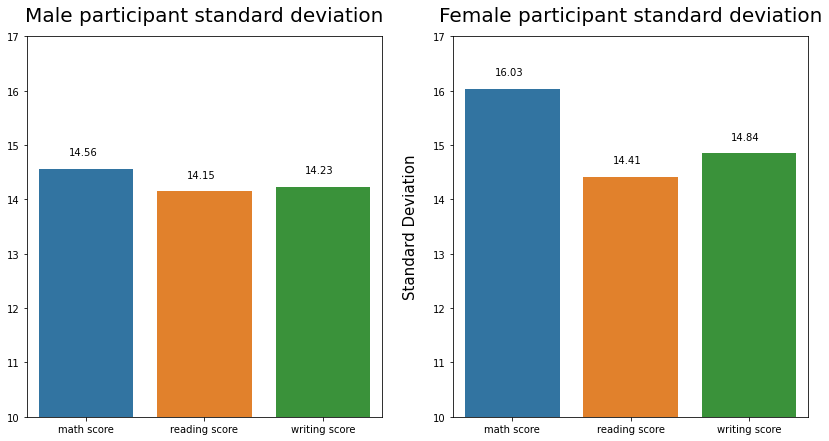

In [13]:
#Plotting graphs for better understanding

fig, ax = plt.subplots(1,2,figsize=(14,7))

ax[0].set_ylim(10, 17)
ax[1].set_ylim(10, 17)
plt.xlabel("xlabel",fontsize=15)
plt.ylabel("ylabel",fontsize=15)

ax[1].yaxis.labelpad = 15
ax[1].xaxis.labelpad = 25
graph=sns.barplot(x=dataMale.columns[1:4].tolist(),y=dataMale.std(),ax=ax[0])
graph.set_title("Male participant standard deviation",fontsize=20,pad=15)
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+.25))

graph=sns.barplot(x=dataFemale.columns[1:4].tolist(),y=dataFemale.std(),ax=ax[1])
graph.set_title("Female participant standard deviation",fontsize=20,pad=15)
graph.set(xlabel=None,ylabel="Standard Deviation")
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+.25))

### <span style="color:green">INSIGHT</span>
#### <span style="color:red">• Both male and female have almost similar standard deviation for Reading and Writing</span> 
#### <span style="color:red">• Math Score of females have highest deviation.</span>

## Test Preparation

In [14]:
#On basis on Test preparation course
dataTestpreparation=data[["test preparation course","math score","reading score","writing score"]]

dataTestnone=dataTestpreparation[dataTestpreparation["test preparation course"]=="none"]
dataTestcom=dataTestpreparation[dataTestpreparation["test preparation course"]=="completed"]

print("Standard deviation of participants who did'nt take course are:\n",dataTestnone.std(),"\n")
print("Standard deviation of participants who took course are:\n",dataTestcom.std())


Standard deviation of participants who did'nt take course are:
 math score       15.705689
reading score    14.608896
writing score    15.041667
dtype: float64 

Standard deviation of participants who took course are:
 math score       14.521847
reading score    13.537572
writing score    13.236412
dtype: float64


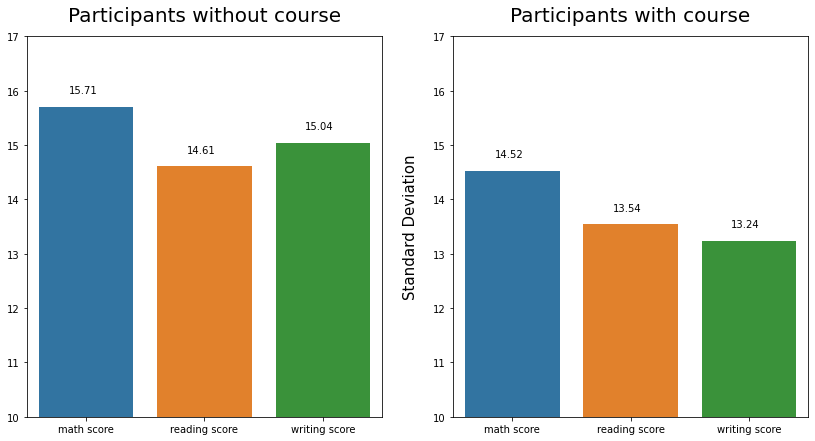

In [15]:
#Plotting graphs for better understanding

fig, ax = plt.subplots(1,2,figsize=(14,7))

ax[0].set_ylim(10, 17)
ax[1].set_ylim(10, 17)
plt.xlabel("xlabel",fontsize=15)
plt.ylabel("ylabel",fontsize=15)

ax[1].yaxis.labelpad = 15
ax[1].xaxis.labelpad = 25
graph=sns.barplot(x=dataTestnone.columns[1:4].tolist(),y=dataTestnone.std(),ax=ax[0])
graph.set_title("Participants without course",fontsize=20,pad=15)
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+.25))

graph=sns.barplot(x=dataTestcom.columns[1:4].tolist(),y=dataTestcom.std(),ax=ax[1])
graph.set_title("Participants with course",fontsize=20,pad=15)
graph.set(xlabel=None,ylabel="Standard Deviation")
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+.25))

### <span style="color:green">INSIGHT</span>
#### <span style="color:red">• Participants who did'nt do course shows a higher variation in scores as compared to participants who completed course</span>
#### <span style="color:red">• Within different tests, Maths shows more variation compared to others</span>

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [16]:
#Sorting data in descending order of maths score

dataSortedByMaths=data.sort_values(by=['math score'],ascending=False)
dataSortedByMaths

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [17]:
#Finding Top 25% on basis of maths score-And note the score-ie 77

dataSortedByMaths.head(int(len(dataSortedByMaths)*(25/100)))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


### <span style="color:green">25% of 1000 member data is 250. The maths score by top 250th student is 77, Management will have to give bonus points to all scored 77 and above, ie 255 students, five more than desired.</span>

In [18]:
dataSortedByMaths[dataSortedByMaths["math score"]>=77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
421,female,group C,some college,free/reduced,none,77,90,91
